In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [65]:
seoul = pd.read_csv('/content/drive/MyDrive/KDT AI, 빅데이터 전문가 양성과정/data/7_Statistics&Numpy/08_19/seoul.csv')
seoul

,사용일자,노선명,역명,승차총승객수,하차총승객수,승하차객수
0,20240701,9호선2~3단계,석촌고분,7665,7414,15079
1,20240701,중앙선,도농,12178,10957,23135
2,20240701,중앙선,구리,14053,14085,28138
3,20240701,4호선,길음,22687,22215,44902
4,20240701,분당선,복정,1,0,1
...,...,...,...,...,...,...
19098,20240731,7호선,신풍,11494,10664,22158
19099,20240731,7호선,대림(구로구청),9328,9366,18694
19100,20240731,7호선,남구로,15284,16072,31356
19101,20240731,7호선,가산디지털단지,47493,47452,94945


1. 각 지하철 역별 평균 이용객 수

In [74]:
seoul.groupby('역명').sum()['승하차객수']

,승하차객수
역명,
4.19민주묘지,178406
가능,373418
가락시장,1011033
가산디지털단지,3576861
가양,1313196
...,...
회기,1431436
회룡,757577
회현(남대문시장),1620940


In [11]:
seoul.groupby('역명').count()['승하차객수']

,승하차객수
역명,
4.19민주묘지,31
가능,31
가락시장,62
가산디지털단지,62
가양,31
...,...
회기,31
회룡,31
회현(남대문시장),31


In [12]:
seoul.groupby('역명').sum()['승하차객수'] / seoul.groupby('역명').count()['승하차객수']

,승하차객수
역명,
4.19민주묘지,5755.032258
가능,12045.741935
가락시장,16306.983871
가산디지털단지,57691.306452
가양,42361.161290
...,...
회기,46175.354839
회룡,24437.967742
회현(남대문시장),52288.387097


2. 각 지하철 역별 이용객수의 표준편차

In [45]:
list(seoul.groupby('역명')['승하차객수'])

[('4.19민주묘지',
  52       6769
  665      5443
  1288     6633
  2352     6579
  2525     6481
  3650     4856
  3741     4528
  4886     6001
  5288     6264
  5945     6395
  6567     6387
  7178     6613
  7517     5492
  8495     4707
  8751     6399
  9328     6155
  10307    5531
  11047    5242
  11158    6301
  11899    4910
  12769    4134
  13062    5627
  13972    5917
  14757    6312
  15373    6391
  15975    6002
  16062    4684
  16843    4160
  17845    5803
  18449    5792
  18801    5898
  Name: 승하차객수, dtype: int64),
 ('가능',
  234      13846
  847      12591
  1761     13800
  1963     13949
  3047     13905
  3467      9978
  3923      8206
  4704     12752
  5471     13799
  6128     13848
  6749     13941
  6957     14167
  7929     10876
  8191      8170
  8934     13685
  9375     13627
  10386    11379
  10866     6940
  11590    13977
  11788    10283
  12330     7796
  13182    12685
  14154    12923
  14575    13435
  15191    13311
  15791    13243
  16245   

In [102]:
seoul_pd_total = pd.DataFrame(list(seoul.groupby('역명')['승하차객수']), columns = ['역명','승하차객수'])

In [103]:
seoul_pd_total

,역명,승하차객수
0,4.19민주묘지,52 6769 665 5443 1288 6633 2352...
1,가능,234 13846 847 12591 1761 13800 1...
2,가락시장,353 17807 524 19386 967 16902 1...
3,가산디지털단지,284 42118 365 103399 897 4071...
4,가양,336 48263 950 45115 1659 48725 2...
...,...,...
523,회기,14 51712 636 47921 1259 52425 2...
524,회룡,236 27986 849 25254 1759 27781 1...
525,회현(남대문시장),506 57391 1121 54178 1490 61446 2...
526,효창공원앞,219 7612 424 15349 832 7268 1...


In [99]:
pd.Series(seoul_pd_total.loc[0,'승하차객수'].reset_index(drop=True))

,승하차객수
0,6769
1,5443
2,6633
3,6579
4,6481
5,4856
6,4528
7,6001
8,6264
9,6395


In [89]:
seoul_pd_total_series = pd.Series(seoul_pd_total.loc[0,'승하차객수'].reset_index(drop=True))
list(seoul_pd_total_series)

[6769,
 5443,
 6633,
 6579,
 6481,
 4856,
 4528,
 6001,
 6264,
 6395,
 6387,
 6613,
 5492,
 4707,
 6399,
 6155,
 5531,
 5242,
 6301,
 4910,
 4134,
 5627,
 5917,
 6312,
 6391,
 6002,
 4684,
 4160,
 5803,
 5792,
 5898]

In [105]:
for i in range(len(seoul_pd_total)):
  seoul_pd_total_series = pd.Series(seoul_pd_total.loc[i,'승하차객수'].reset_index(drop=True))
  seoul_pd_total.loc[i,'승하차객수']= list(seoul_pd_total_series)

In [106]:
seoul_pd_total

,역명,승하차객수
0,4.19민주묘지,"[6769, 5443, 6633, 6579, 6481, 4856, 4528, 600..."
1,가능,"[13846, 12591, 13800, 13949, 13905, 9978, 8206..."
2,가락시장,"[17807, 19386, 16902, 18591, 19882, 18223, 184..."
3,가산디지털단지,"[42118, 103399, 40710, 102106, 103360, 42273, ..."
4,가양,"[48263, 45115, 48725, 49048, 49601, 30566, 255..."
...,...,...
523,회기,"[51712, 47921, 52425, 52009, 54049, 38839, 322..."
524,회룡,"[27986, 25254, 27781, 28381, 28716, 20405, 171..."
525,회현(남대문시장),"[57391, 54178, 61446, 62875, 61401, 43575, 220..."
526,효창공원앞,"[7612, 15349, 7268, 14611, 15464, 7598, 7688, ..."


In [108]:
seoul_pd_total['표준편차'] = ''
for i in range(len(seoul_pd_total)):
  seoul_pd_total.loc[i,'표준편차'] = np.std(seoul_pd_total.iloc[i,1])

seoul_pd_total

,역명,승하차객수,표준편차
0,4.19민주묘지,"[6769, 5443, 6633, 6579, 6481, 4856, 4528, 600...",751.555311
1,가능,"[13846, 12591, 13800, 13949, 13905, 9978, 8206...",2205.796381
2,가락시장,"[17807, 19386, 16902, 18591, 19882, 18223, 184...",4019.289423
3,가산디지털단지,"[42118, 103399, 40710, 102106, 103360, 42273, ...",34801.571843
4,가양,"[48263, 45115, 48725, 49048, 49601, 30566, 255...",8962.07043
...,...,...,...
523,회기,"[51712, 47921, 52425, 52009, 54049, 38839, 322...",6962.352024
524,회룡,"[27986, 25254, 27781, 28381, 28716, 20405, 171...",4375.725167
525,회현(남대문시장),"[57391, 54178, 61446, 62875, 61401, 43575, 220...",12922.224091
526,효창공원앞,"[7612, 15349, 7268, 14611, 15464, 7598, 7688, ...",4108.366679


In [109]:
seoul.groupby('역명').describe()['승하차객수']['std']

,std
역명,
4.19민주묘지,763.978555
가능,2242.258296
가락시장,4052.100494
가산디지털단지,35085.671021
가양,9110.213862
...,...
회기,7077.440020
회룡,4448.056103
회현(남대문시장),13135.829043


3. 가장 많은 이용객이 있는 역의 이용객 수

In [143]:
seoul_df = pd.DataFrame(seoul.groupby('역명').sum()['승하차객수'])
seoul_df.reset_index(inplace = True)
seoul_df['승하차객수'].idxmax()
seoul_df.iloc[seoul_df['승하차객수'].idxmax(),1]

5993237

4. 가장 적은 이용객이 있는 역의 이용객 수

In [144]:
seoul_df.iloc[seoul_df['승하차객수'].idxmin(),1]

1

5. 이용객 수가 가장 많은 역의 이름

In [145]:
seoul_df.iloc[seoul_df['승하차객수'].idxmax(),0]

'잠실(송파구청)'

6. 이용객 수가 가장 적은 역의 이름

In [146]:
seoul_df.iloc[seoul_df['승하차객수'].idxmin(),0]

'까치울'

7. 이용객 수의 분포를 히스토그램으로 시각화

In [148]:
seoul_df

,역명,승하차객수
0,4.19민주묘지,178406
1,가능,373418
2,가락시장,1011033
3,가산디지털단지,3576861
4,가양,1313196
...,...,...
523,회기,1431436
524,회룡,757577
525,회현(남대문시장),1620940
526,효창공원앞,606451


In [149]:
seoul_df['승하차객수'].describe()

,승하차객수
count,5.280000e+02
mean,8.041291e+05
std,8.565323e+05
min,1.000000e+00
25%,2.667568e+05
50%,5.433350e+05
75%,1.011874e+06
max,5.993237e+06


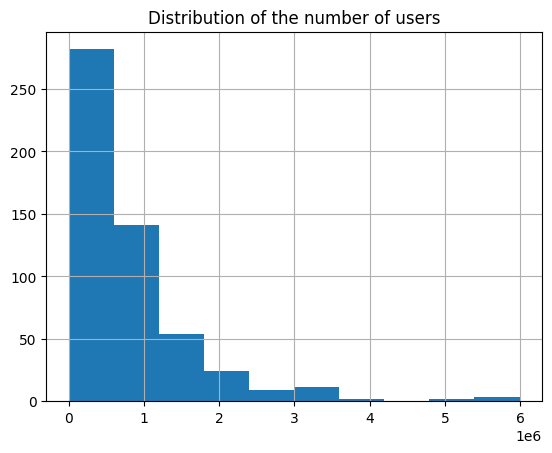

In [155]:
plt.hist(seoul_df['승하차객수'], bins = 10)
plt.grid(visible = True)
plt.title('Distribution of the number of users')
plt.show()